### Código feito por Rafael da Silva Fernandes - DRE: 117196229

## Importação de bibliotecas

In [1]:
import re
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

## Entradas

### Entrada 1

In [2]:
M1 = [['O peã e o caval são pec de xadrez. O caval é o melhor do jog.'],
['A jog envolv a torr, o peã e o rei.'],
['O peã lac o boi'],
['Caval de rodei!'],
['Polic o jog no xadrez.']] #conjunto de documentos

stopwords1 = ['a', 'o', 'e', 'é', 'de', 'do', 'no','são', ''] #lista de stopword

q1 = 'xadrez peã caval torr' #consulta

separadores1 = [' ',',','.','!','?'] #separadores para tokenizacao

R1 = [1, 2] #identificador dos documentos relevantes para a consulta q (indica primeiro e segundo documentos)

### Entrada 2

In [3]:
M2 = [['Parasita é o grande vencedor do Oscar 2020, com quatro prêmios'],
['Green Book, Roma e Bohemian Rhapsody são os principais vencedores do Oscar 2019'],
['Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noite'],
['Em boa fase, Oscar sonha em jogar a Copa do Mundo da Rússia'],
['Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro'],
['Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos.'],
['Seleção brasileira vai observar de 35 a 40 jogadores para definir lista da Copa América'],
['Oscar 2020: saiba como é a escolha dos jurados e como eles votam'],
['Bem, Amigos! discute lista da Seleção, e Galvão dá recado a Tite: Cadê o Luan?'],
['IFAL-Maceió convoca aprovados em lista de espera do SISU para chamada oral'],
['Arrascaeta e Matías Viña são convocados pelo Uruguai para eliminatórias da Copa. Além deles, há outros destaques na lista.'],
['Oscar do Vinho: confira os rótulos de destaque da safra 2018'],
['Parasita é o vencedor da Palma de Ouro no Festival de Cannes'],
['Estatísticas. Brasileirão Série A: Os artilheiros e garçons da temporada 2020'],
['Setembro chegou! Confira o calendário da temporada 2020/2021 do futebol europeu']] #conjunto de documentos

stopwords2 = ['a', 'o', 'e', 'é', 'de', 'do', 'da', 'no', 'na', 'são', 'dos', 'com','como',
'eles', 'em', 'os', 'ao', 'para', 'pelo', ''] #lista de stopwords

q2 = 'oscar 2020' #consulta

separadores2 = [' ',',','.','!','?',':',';','/'] #separadores para tokenizacao

R2 = [1, 3, 5, 8] #identificador dos documentos relevantes para a consulta q

## Funções

### Tokenização

In [4]:
def tokenizacao(M, separadores):
    
    tokens = []
    
    regular_exp = '|'.join(map(re.escape, separadores))
    
    for i in range(len(M)):
        tokens.append(re.split(regular_exp, str(M[i]).replace('[', '').replace(']', '').replace("'",'')))
    
    return tokens

#### Teste para a entrada 1

In [5]:
tokens1 = tokenizacao(M1, separadores1)
tokens1

[['O',
  'peã',
  'e',
  'o',
  'caval',
  'são',
  'pec',
  'de',
  'xadrez',
  '',
  'O',
  'caval',
  'é',
  'o',
  'melhor',
  'do',
  'jog',
  ''],
 ['A', 'jog', 'envolv', 'a', 'torr', '', 'o', 'peã', 'e', 'o', 'rei', ''],
 ['O', 'peã', 'lac', 'o', 'boi'],
 ['Caval', 'de', 'rodei', ''],
 ['Polic', 'o', 'jog', 'no', 'xadrez', '']]

#### Teste para a entrada 2

In [6]:
tokens2 = tokenizacao(M2, separadores2)
tokens2

[['Parasita',
  'é',
  'o',
  'grande',
  'vencedor',
  'do',
  'Oscar',
  '2020',
  '',
  'com',
  'quatro',
  'prêmios'],
 ['Green',
  'Book',
  '',
  'Roma',
  'e',
  'Bohemian',
  'Rhapsody',
  'são',
  'os',
  'principais',
  'vencedores',
  'do',
  'Oscar',
  '2019'],
 ['Oscar',
  '2020',
  '',
  'Confira',
  'lista',
  'completa',
  'de',
  'vencedores',
  '',
  'Parasita',
  'e',
  '1917',
  'foram',
  'os',
  'grandes',
  'vencedores',
  'da',
  'noite'],
 ['Em',
  'boa',
  'fase',
  '',
  'Oscar',
  'sonha',
  'em',
  'jogar',
  'a',
  'Copa',
  'do',
  'Mundo',
  'da',
  'Rússia'],
 ['Conheça',
  'os',
  'indicados',
  'ao',
  'Oscar',
  '2020',
  '',
  'Cerimônia',
  'de',
  'premiação',
  'acontece',
  'em',
  'fevereiro'],
 ['Oscar',
  'Schmidt',
  'receberá',
  'Troféu',
  'no',
  'Prêmio',
  'Brasil',
  'Olímpico',
  '2019',
  '',
  'Jogador',
  'de',
  'basquete',
  'com',
  'mais',
  'pontos',
  'em',
  'Jogos',
  'Olímpicos',
  ''],
 ['Seleção',
  'brasileira',
  'va

### Normalização

In [7]:
def normalizacao(tokens):
    
    tokens_normalizados = []
    
    for i in range(len(tokens)):
        tokens_normalizados.append(list(map(lambda x: x.lower(), tokens[i])))  

    return tokens_normalizados

#### Teste para a entrada 1

In [8]:
tokens_normalizados1 = normalizacao(tokens1)
tokens_normalizados1

[['o',
  'peã',
  'e',
  'o',
  'caval',
  'são',
  'pec',
  'de',
  'xadrez',
  '',
  'o',
  'caval',
  'é',
  'o',
  'melhor',
  'do',
  'jog',
  ''],
 ['a', 'jog', 'envolv', 'a', 'torr', '', 'o', 'peã', 'e', 'o', 'rei', ''],
 ['o', 'peã', 'lac', 'o', 'boi'],
 ['caval', 'de', 'rodei', ''],
 ['polic', 'o', 'jog', 'no', 'xadrez', '']]

#### Teste para a entrada 2

In [9]:
tokens_normalizados2 = normalizacao(tokens2)
tokens_normalizados2

[['parasita',
  'é',
  'o',
  'grande',
  'vencedor',
  'do',
  'oscar',
  '2020',
  '',
  'com',
  'quatro',
  'prêmios'],
 ['green',
  'book',
  '',
  'roma',
  'e',
  'bohemian',
  'rhapsody',
  'são',
  'os',
  'principais',
  'vencedores',
  'do',
  'oscar',
  '2019'],
 ['oscar',
  '2020',
  '',
  'confira',
  'lista',
  'completa',
  'de',
  'vencedores',
  '',
  'parasita',
  'e',
  '1917',
  'foram',
  'os',
  'grandes',
  'vencedores',
  'da',
  'noite'],
 ['em',
  'boa',
  'fase',
  '',
  'oscar',
  'sonha',
  'em',
  'jogar',
  'a',
  'copa',
  'do',
  'mundo',
  'da',
  'rússia'],
 ['conheça',
  'os',
  'indicados',
  'ao',
  'oscar',
  '2020',
  '',
  'cerimônia',
  'de',
  'premiação',
  'acontece',
  'em',
  'fevereiro'],
 ['oscar',
  'schmidt',
  'receberá',
  'troféu',
  'no',
  'prêmio',
  'brasil',
  'olímpico',
  '2019',
  '',
  'jogador',
  'de',
  'basquete',
  'com',
  'mais',
  'pontos',
  'em',
  'jogos',
  'olímpicos',
  ''],
 ['seleção',
  'brasileira',
  'va

### Remoção de stopwords

In [10]:
def remocao_stopword(tokens, stopwords):

    tokens_sem_stopwords = []
    
    for i in range(len(tokens)):
        tokens_sem_stopwords.append([j for j in tokens[i] if j not in stopwords])
        
    return tokens_sem_stopwords

#### Teste para a entrada 1

In [11]:
tokens_sem_stopwords1 = remocao_stopword(tokens_normalizados1, stopwords1)
tokens_sem_stopwords1

[['peã', 'caval', 'pec', 'xadrez', 'caval', 'melhor', 'jog'],
 ['jog', 'envolv', 'torr', 'peã', 'rei'],
 ['peã', 'lac', 'boi'],
 ['caval', 'rodei'],
 ['polic', 'jog', 'xadrez']]

#### Teste para a entrada 2

In [12]:
tokens_sem_stopwords2 = remocao_stopword(tokens_normalizados2, stopwords2)
tokens_sem_stopwords2

[['parasita', 'grande', 'vencedor', 'oscar', '2020', 'quatro', 'prêmios'],
 ['green',
  'book',
  'roma',
  'bohemian',
  'rhapsody',
  'principais',
  'vencedores',
  'oscar',
  '2019'],
 ['oscar',
  '2020',
  'confira',
  'lista',
  'completa',
  'vencedores',
  'parasita',
  '1917',
  'foram',
  'grandes',
  'vencedores',
  'noite'],
 ['boa', 'fase', 'oscar', 'sonha', 'jogar', 'copa', 'mundo', 'rússia'],
 ['conheça',
  'indicados',
  'oscar',
  '2020',
  'cerimônia',
  'premiação',
  'acontece',
  'fevereiro'],
 ['oscar',
  'schmidt',
  'receberá',
  'troféu',
  'prêmio',
  'brasil',
  'olímpico',
  '2019',
  'jogador',
  'basquete',
  'mais',
  'pontos',
  'jogos',
  'olímpicos'],
 ['seleção',
  'brasileira',
  'vai',
  'observar',
  '35',
  '40',
  'jogadores',
  'definir',
  'lista',
  'copa',
  'américa'],
 ['oscar', '2020', 'saiba', 'escolha', 'jurados', 'votam'],
 ['bem',
  'amigos',
  'discute',
  'lista',
  'seleção',
  'galvão',
  'dá',
  'recado',
  'tite',
  'cadê',
  'lu

### Matriz de incidência

In [13]:
def matriz_incidencia(tokens):
    
    dicionario = {}
    lista_dicionarios = []
    
    for x in range(len(tokens)):
        dicionario = {i:tokens[x].count(i) for i in tokens[x]}
        lista_dicionarios.append(dicionario)
        
    df = pd.DataFrame(lista_dicionarios).fillna(0).T
    
    return df

#### Teste para a entrada 1

In [14]:
matriz1 = matriz_incidencia(tokens_sem_stopwords1)
matriz1

,0,1,2,3,4
peã,1.0,1.0,1.0,0.0,0.0
caval,2.0,0.0,0.0,1.0,0.0
pec,1.0,0.0,0.0,0.0,0.0
xadrez,1.0,0.0,0.0,0.0,1.0
melhor,1.0,0.0,0.0,0.0,0.0
jog,1.0,1.0,0.0,0.0,1.0
envolv,0.0,1.0,0.0,0.0,0.0
torr,0.0,1.0,0.0,0.0,0.0
rei,0.0,1.0,0.0,0.0,0.0
lac,0.0,0.0,1.0,0.0,0.0


#### Teste para a entrada 2

In [15]:
matriz2 = matriz_incidencia(tokens_sem_stopwords2)
matriz2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parasita,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
grande,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vencedor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
oscar,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chegou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
calendário,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
futebol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Índice invertido

In [16]:
def indice_invertido(matriz):
    
    lista_indice_documentos = []
    indice_invertido = {}
    
    index = matriz.index
    
    for palavra in range(len(index)):
        for documento in range(len(matriz.columns)):
            if matriz.iloc[palavra].values[documento] > 0:
                lista_indice_documentos.append(documento)
                
        indice_invertido[index[palavra]] = lista_indice_documentos
        lista_indice_documentos = []
        
    return indice_invertido

#### Teste para a entrada 1

In [17]:
indice_invertido1 = indice_invertido(matriz1)
indice_invertido1

{'peã': [0, 1, 2],
 'caval': [0, 3],
 'pec': [0],
 'xadrez': [0, 4],
 'melhor': [0],
 'jog': [0, 1, 4],
 'envolv': [1],
 'torr': [1],
 'rei': [1],
 'lac': [2],
 'boi': [2],
 'rodei': [3],
 'polic': [4]}

#### Teste para a entrada 2

In [18]:
indice_invertido2 = indice_invertido(matriz2)
indice_invertido2

{'parasita': [0, 2, 12],
 'grande': [0],
 'vencedor': [0, 12],
 'oscar': [0, 1, 2, 3, 4, 5, 7, 11],
 '2020': [0, 2, 4, 7, 13, 14],
 'quatro': [0],
 'prêmios': [0],
 'green': [1],
 'book': [1],
 'roma': [1],
 'bohemian': [1],
 'rhapsody': [1],
 'principais': [1],
 'vencedores': [1, 2],
 '2019': [1, 5],
 'confira': [2, 11, 14],
 'lista': [2, 6, 8, 9, 10],
 'completa': [2],
 '1917': [2],
 'foram': [2],
 'grandes': [2],
 'noite': [2],
 'boa': [3],
 'fase': [3],
 'sonha': [3],
 'jogar': [3],
 'copa': [3, 6, 10],
 'mundo': [3],
 'rússia': [3],
 'conheça': [4],
 'indicados': [4],
 'cerimônia': [4],
 'premiação': [4],
 'acontece': [4],
 'fevereiro': [4],
 'schmidt': [5],
 'receberá': [5],
 'troféu': [5],
 'prêmio': [5],
 'brasil': [5],
 'olímpico': [5],
 'jogador': [5],
 'basquete': [5],
 'mais': [5],
 'pontos': [5],
 'jogos': [5],
 'olímpicos': [5],
 'seleção': [6, 8],
 'brasileira': [6],
 'vai': [6],
 'observar': [6],
 '35': [6],
 '40': [6],
 'jogadores': [6],
 'definir': [6],
 'américa': [6

### Consulta

In [19]:
def consulta(q, indice_invertido, M, tipo):
    
    listas_indices = []
    
    for palavra in q.split(' '):
        if palavra in indice_invertido:
            listas_indices.append(indice_invertido[palavra])
    
    indices_consulta = []
    
    for indice in range(len(listas_indices)):
        for posicao in range(len(M)):
            if tipo == "and":
                if posicao in listas_indices[indice - 1] and posicao in listas_indices[indice]:
                    indices_consulta.append(posicao)
            elif tipo == "or":
                if posicao in listas_indices[indice - 1] or posicao in listas_indices[indice]:
                    indices_consulta.append(posicao)
            else:
                print("Parâmetro 'tipo' deve ser 'and' ou 'or' apenas.")
    
    indices_consulta = list(set(indices_consulta))
    
    if indices_consulta == []:
        print("Nenhum documento corresponde à consulta desejada.")
    else:
        for indice in indices_consulta:
            print(M[indice])

#### Teste para a entrada 1 - AND

In [20]:
print("Consulta AND: " + q1)
consulta(q1, indice_invertido1, M1, "and")

Consulta AND: xadrez peã caval torr
['O peã e o caval são pec de xadrez. O caval é o melhor do jog.']


#### Teste para a entrada 1 - OR

In [21]:
print("Consulta OR: " + q1)
consulta(q1, indice_invertido1, M1, "or")

Consulta OR: xadrez peã caval torr
['O peã e o caval são pec de xadrez. O caval é o melhor do jog.']
['A jog envolv a torr, o peã e o rei.']
['O peã lac o boi']
['Caval de rodei!']
['Polic o jog no xadrez.']


#### Teste para a entrada 2 - AND

In [22]:
print("Consulta AND: " + q2)
consulta(q2, indice_invertido2, M2, "and")

Consulta AND: oscar 2020
['Parasita é o grande vencedor do Oscar 2020, com quatro prêmios']
['Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noite']
['Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro']
['Oscar 2020: saiba como é a escolha dos jurados e como eles votam']


#### Teste para a entrada 2 - OR

In [23]:
print("Consulta OR: " + q2)
consulta(q2, indice_invertido2, M2, "or")

Consulta OR: oscar 2020
['Parasita é o grande vencedor do Oscar 2020, com quatro prêmios']
['Green Book, Roma e Bohemian Rhapsody são os principais vencedores do Oscar 2019']
['Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noite']
['Em boa fase, Oscar sonha em jogar a Copa do Mundo da Rússia']
['Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro']
['Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos.']
['Oscar 2020: saiba como é a escolha dos jurados e como eles votam']
['Oscar do Vinho: confira os rótulos de destaque da safra 2018']
['Estatísticas. Brasileirão Série A: Os artilheiros e garçons da temporada 2020']
['Setembro chegou! Confira o calendário da temporada 2020/2021 do futebol europeu']


### TF

In [24]:
def tf(matriz, M, q):
    
    for column in matriz.columns:
        matriz["TFi, " + str(column)] = 0
        
    for palavra in range(len(matriz.index)):
        for documento in range(len(matriz.columns[:len(M)])):
            numero_ocorrencias = matriz.iloc[palavra].values[documento]
            
            if numero_ocorrencias > 0:
                matriz.iloc[palavra, documento + len(M)] = 1 + math.log(numero_ocorrencias, 2)
                
    indices_consulta = []
    matriz["Wi, q"] = 0
    
    for termo in q.split(' '):
        if termo in matriz.index:
            indices_consulta.append(list(matriz.index).index(termo))
            
    for indice in indices_consulta:
        for documento in range(len(matriz.columns[:len(M)])):
            frequencia_consulta = matriz.iloc[indice].values[documento]
            
            if frequencia_consulta > 0:
                matriz.iloc[indice, -1] = 1 + math.log(frequencia_consulta, 2)
        
        
    return matriz

#### Teste para a entrada 1

In [25]:
tf(matriz1, M1, q1)

,0,1,2,3,4,"TFi, 0","TFi, 1","TFi, 2","TFi, 3","TFi, 4","Wi, q"
peã,1.0,1.0,1.0,0.0,0.0,1,1,1,0,0,1
caval,2.0,0.0,0.0,1.0,0.0,2,0,0,1,0,1
pec,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
xadrez,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,1
melhor,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
jog,1.0,1.0,0.0,0.0,1.0,1,1,0,0,1,0
envolv,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0
torr,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1
rei,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0
lac,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0


#### Teste para a entrada 2

In [26]:
tf2 = tf(matriz2, M2, q2)
tf2

,0,1,2,3,4,5,6,7,8,9,...,"TFi, 6","TFi, 7","TFi, 8","TFi, 9","TFi, 10","TFi, 11","TFi, 12","TFi, 13","TFi, 14","Wi, q"
parasita,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
grande,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
vencedor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
oscar,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chegou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
calendário,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
futebol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


### IDF

In [27]:
def idf(matriz, indice_invertido, M):
    
    lista_frequencia = [len(value) for key, value in indice_invertido.items()]
    matriz["ni"] = lista_frequencia
    
    matriz["IDFi"] = 0 
    
    for palavra in range(len(matriz.index)):
        for documento in range(len(matriz.columns[:len(M)])):
            
            numerador = len(M)/ matriz["ni"][palavra]
            
            matriz.iloc[palavra, 2*len(M) + 2] = math.log(numerador, 2)
        
    
    return matriz

#### Teste para a entrada 1

In [28]:
idf1 = idf(matriz1, indice_invertido1, M1)
idf1

,0,1,2,3,4,"TFi, 0","TFi, 1","TFi, 2","TFi, 3","TFi, 4","Wi, q",ni,IDFi
peã,1.0,1.0,1.0,0.0,0.0,1,1,1,0,0,1,3,0.736966
caval,2.0,0.0,0.0,1.0,0.0,2,0,0,1,0,1,2,1.321928
pec,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.321928
xadrez,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,1,2,1.321928
melhor,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.321928
jog,1.0,1.0,0.0,0.0,1.0,1,1,0,0,1,0,3,0.736966
envolv,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.321928
torr,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,1,2.321928
rei,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.321928
lac,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,2.321928


#### Teste para a entrada 2

In [29]:
idf2 = idf(matriz2, indice_invertido2, M2)
idf2

,0,1,2,3,4,5,6,7,8,9,...,"TFi, 8","TFi, 9","TFi, 10","TFi, 11","TFi, 12","TFi, 13","TFi, 14","Wi, q",ni,IDFi
parasita,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,3,2.321928
grande,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,3.906891
vencedor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,2,2.906891
oscar,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,8,0.906891
2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,1,6,1.321928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chegou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,3.906891
calendário,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,3.906891
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,3.906891
futebol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,3.906891


### Ponderação de Termos TF-IDF

In [30]:
def ponderacao_tf_idf(matriz, M):
    
    for column in matriz.columns[:len(M)]:
        matriz["d" + str(column)] = 0
        
    for palavra in range(len(matriz.index)):
        for documento in range(len(matriz.columns[:len(M)])):
            
            tf = matriz.iloc[palavra, documento + len(M)]
            idf = matriz["IDFi"][palavra]
            
            multiplicacao = tf * idf
            
            matriz.iloc[palavra, documento + 2 * len(M) + 3] = multiplicacao
            
    return matriz

#### Teste para a entrada 1

In [31]:
ponderacao_tf_idf1 = ponderacao_tf_idf(matriz1, M1)
ponderacao_tf_idf1

,0,1,2,3,4,"TFi, 0","TFi, 1","TFi, 2","TFi, 3","TFi, 4","Wi, q",ni,IDFi,d0,d1,d2,d3,d4
peã,1.0,1.0,1.0,0.0,0.0,1,1,1,0,0,1,3,0.736966,0.736966,0.736966,0.736966,0.000000,0.000000
caval,2.0,0.0,0.0,1.0,0.0,2,0,0,1,0,1,2,1.321928,2.643856,0.000000,0.000000,1.321928,0.000000
pec,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.321928,2.321928,0.000000,0.000000,0.000000,0.000000
xadrez,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,1,2,1.321928,1.321928,0.000000,0.000000,0.000000,1.321928
melhor,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.321928,2.321928,0.000000,0.000000,0.000000,0.000000
jog,1.0,1.0,0.0,0.0,1.0,1,1,0,0,1,0,3,0.736966,0.736966,0.736966,0.000000,0.000000,0.736966
envolv,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.321928,0.000000,2.321928,0.000000,0.000000,0.000000
torr,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,1,2.321928,0.000000,2.321928,0.000000,0.000000,0.000000
rei,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.321928,0.000000,2.321928,0.000000,0.000000,0.000000
lac,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,2.321928,0.000000,0.000000,2.321928,0.000000,0.000000


#### Teste para a entrada 2

In [32]:
ponderacao_tf_idf2 = ponderacao_tf_idf(matriz2, M2)
ponderacao_tf_idf2

,0,1,2,3,4,5,6,7,8,9,...,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14
parasita,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,2.321928,0.000000,0.000000
grande,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
vencedor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,2.906891,0.000000,0.000000
oscar,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.906891,0.0,0.906891,0.0,0.0,0.0,0.906891,0.000000,0.000000,0.000000
2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,1.321928,0.0,0.0,0.0,0.000000,0.000000,1.321928,1.321928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chegou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.906891
calendário,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.906891
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.906891
futebol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.906891


### Similaridade

In [33]:
def similaridade(matriz, M):
    
    numerador = 0
    wij2 = 0
    wiq2 = 0
    
    for column in matriz.columns[:len(M)]:
        matriz["sim d" + str(column)] = 0
        
    for documento in range(len(matriz.columns[:len(M)])):
        for palavra in range(len(matriz.index)):
            
            wij = matriz.iloc[palavra, documento + 2 * len(M) + 3]
            wiq = matriz["Wi, q"][palavra]
            numerador += wij * wiq
            
            wij2 += wij ** 2
            wiq2 += wiq ** 2
        
        wij2 **= 1/2
        wiq2 **= 1/2
        denominador = wij2 * wiq2
        
        matriz["sim d" + str(documento)] = numerador/ denominador
        numerador = 0
        denominador = 0
        
    return matriz

#### Teste para a entrada 1

In [34]:
similaridade1 = similaridade(matriz1, M1)
similaridade1

,0,1,2,3,4,"TFi, 0","TFi, 1","TFi, 2","TFi, 3","TFi, 4",...,d0,d1,d2,d3,d4,sim d0,sim d1,sim d2,sim d3,sim d4
peã,1.0,1.0,1.0,0.0,0.0,1,1,1,0,0,...,0.736966,0.736966,0.736966,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
caval,2.0,0.0,0.0,1.0,0.0,2,0,0,1,0,...,2.643856,0.000000,0.000000,1.321928,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
pec,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,...,2.321928,0.000000,0.000000,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
xadrez,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,...,1.321928,0.000000,0.000000,0.000000,1.321928,0.517989,0.267463,0.07256,0.154891,0.155514
melhor,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,...,2.321928,0.000000,0.000000,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
jog,1.0,1.0,0.0,0.0,1.0,1,1,0,0,1,...,0.736966,0.736966,0.000000,0.000000,0.736966,0.517989,0.267463,0.07256,0.154891,0.155514
envolv,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0.000000,2.321928,0.000000,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
torr,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0.000000,2.321928,0.000000,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
rei,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0.000000,2.321928,0.000000,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514
lac,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,...,0.000000,0.000000,2.321928,0.000000,0.000000,0.517989,0.267463,0.07256,0.154891,0.155514


#### Teste para a entrada 2

In [35]:
similaridade2 = similaridade(matriz2, M2)
similaridade2

,0,1,2,3,4,5,6,7,8,9,...,sim d5,sim d6,sim d7,sim d8,sim d9,sim d10,sim d11,sim d12,sim d13,sim d14
parasita,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
grande,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
vencedor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
oscar,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chegou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
calendário,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118
futebol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031861,0.0,0.127849,0.0,0.0,0.0,0.046231,0.0,0.067558,0.061118


### Rank

In [36]:
def rankeamento(matriz, M, q):
    
    indices_consulta = []
    
    soma = 0
    normalizacao = 0
    
    for termo in q.split(' '):
        if termo in matriz.index:
            indices_consulta.append(list(matriz.index).index(termo))
            
    for documento in range(len(matriz.columns[:len(M)])):
        for indice in indices_consulta:
            
            idfi = matriz["IDFi"][indice]
            peso = matriz["d" + str(documento)][indice]
            
            soma += idfi * peso
            
            for palavra in matriz.index:
                normalizacao += (matriz["d" + str(documento)][indice]) ** 2
                
        normalizacao **= 1/2
        
        matriz["rank d" + str(documento)] = soma/ normalizacao
        soma = 0
        normalizacao = 0
        
    return matriz.fillna(0)

#### Teste para a entrada 1

In [37]:
rankeamento1 = rankeamento(matriz1, M1, q1)
rankeamento1

,0,1,2,3,4,"TFi, 0","TFi, 1","TFi, 2","TFi, 3","TFi, 4",...,sim d0,sim d1,sim d2,sim d3,sim d4,rank d0,rank d1,rank d2,rank d3,rank d4
peã,1.0,1.0,1.0,0.0,0.0,1,1,1,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
caval,2.0,0.0,0.0,1.0,0.0,2,0,0,1,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
pec,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
xadrez,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
melhor,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
jog,1.0,1.0,0.0,0.0,1.0,1,1,0,0,1,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
envolv,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
torr,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
rei,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637
lac,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,...,0.517989,0.267463,0.07256,0.154891,0.155514,0.526731,0.675646,0.204397,0.366637,0.366637


#### Teste para a entrada 2

In [38]:
rankeamento2 = rankeamento(matriz2, M2, q2)
rankeamento2

C:\Users\USURIO~2\AppData\Local\Temp/ipykernel_10948/3150772050.py:25: RuntimeWarning: invalid value encountered in double_scalars
  matriz["rank d" + str(documento)] = soma/ normalizacao


,0,1,2,3,4,5,6,7,8,9,...,rank d5,rank d6,rank d7,rank d8,rank d9,rank d10,rank d11,rank d12,rank d13,rank d14
parasita,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
grande,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
vencedor,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
oscar,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chegou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
calendário,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203
futebol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087266,0.0,0.154259,0.0,0.0,0.0,0.087266,0.0,0.127203,0.127203


In [39]:
def ranking_final(matriz, M):
    
    ranks = []
    
    for i in range(len(M)):
        ranks.append(matriz["rank d" + str(i)][0])

    ranks_dict = {i: ranks[i] for i in range(len(ranks))}
    ranks_dict = sorted(ranks_dict.items(), key = lambda x: x[1], reverse = True)
    
    docs = []
    docs_indice = []
    
    for rank in ranks_dict:
        docs_indice.append(rank[0])
        
    for doc in docs_indice:
        docs.append(M[doc])
    
    return docs

#### Teste para a entrada 1

In [40]:
ranking_final1 = ranking_final(matriz1, M1)
ranking_final1

[['A jog envolv a torr, o peã e o rei.'],
 ['O peã e o caval são pec de xadrez. O caval é o melhor do jog.'],
 ['Caval de rodei!'],
 ['Polic o jog no xadrez.'],
 ['O peã lac o boi']]

#### Teste para a entrada 2

In [41]:
ranking_final2 = ranking_final(matriz2, M2)
ranking_final2

[['Parasita é o grande vencedor do Oscar 2020, com quatro prêmios'],
 ['Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noite'],
 ['Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro'],
 ['Green Book, Roma e Bohemian Rhapsody são os principais vencedores do Oscar 2019'],
 ['Em boa fase, Oscar sonha em jogar a Copa do Mundo da Rússia'],
 ['Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos.'],
 ['Seleção brasileira vai observar de 35 a 40 jogadores para definir lista da Copa América'],
 ['Oscar 2020: saiba como é a escolha dos jurados e como eles votam'],
 ['Bem, Amigos! discute lista da Seleção, e Galvão dá recado a Tite: Cadê o Luan?'],
 ['IFAL-Maceió convoca aprovados em lista de espera do SISU para chamada oral'],
 ['Arrascaeta e Matías Viña são convocados pelo Uruguai para eliminatórias da Copa. Além deles, há outros destaques na lista.'],

### Modelo Probabilístico - BM25

In [42]:
def simBM25(tokens_sem_stopwords, q, M, entrada, k = 1, b = 0.75):
    
    avg_doclen = 0
    
    for lista_token in tokens_sem_stopwords:    
        doclen = len(lista_token)
        avg_doclen += doclen
        
    avg_doclen /= len(tokens_sem_stopwords)
    
    similaridade = 0
    similaridades = {}
    
    i = 0
    
    for lista_token in tokens_sem_stopwords:
        doclen = len(lista_token)
        
        for token in lista_token:
            if token not in q:
                continue
                
            if entrada == 1:
                matriz_inc = matriz1
                indice_inv = indice_invertido1
                idf_sim = idf1["IDFi"]
            elif entrada == 2:
                matriz_inc = matriz2
                indice_inv = indice_invertido2
                idf_sim = idf2["IDFi"]
            else:
                return "Parâmetro 'entrada' deve ser 1 ou 2, apenas"
            
            contagem_tokens = len(indice_inv[token])
            
        similaridade += idf_sim[token] * (contagem_tokens * (k + 1))/ (contagem_tokens + k * (1 - b + (b * doclen/ avg_doclen)))   
        
        if similaridade >= 0:
            similaridades[i] = similaridade
        
        similaridade = 0
        i += 1
        
        bm25 = sorted(similaridades.items(), key = lambda item: item[1], reverse = True)
        
        docs = []
        docs_indice = []

        for rank in bm25:
            docs_indice.append(rank[0])

        for doc in docs_indice:
            docs.append(M[doc])

    return docs            

#### Teste para a entrada 1

In [43]:
simBM25(tokens_sem_stopwords1, q1, M1, 1)

[['O peã lac o boi'],
 ['Caval de rodei!'],
 ['A jog envolv a torr, o peã e o rei.'],
 ['Polic o jog no xadrez.'],
 ['O peã e o caval são pec de xadrez. O caval é o melhor do jog.']]

#### Teste para a entrada 2

In [44]:
simBM25(tokens_sem_stopwords2, q2, M2, 2)

[['Parasita é o vencedor da Palma de Ouro no Festival de Cannes'],
 ['Oscar do Vinho: confira os rótulos de destaque da safra 2018'],
 ['Em boa fase, Oscar sonha em jogar a Copa do Mundo da Rússia'],
 ['Oscar 2020: saiba como é a escolha dos jurados e como eles votam'],
 ['Parasita é o grande vencedor do Oscar 2020, com quatro prêmios'],
 ['Seleção brasileira vai observar de 35 a 40 jogadores para definir lista da Copa América'],
 ['Conheça os indicados ao Oscar 2020; Cerimônia de premiação acontece em fevereiro'],
 ['IFAL-Maceió convoca aprovados em lista de espera do SISU para chamada oral'],
 ['Setembro chegou! Confira o calendário da temporada 2020/2021 do futebol europeu'],
 ['Oscar Schmidt receberá Troféu no Prêmio Brasil Olímpico 2019. Jogador de basquete com mais pontos em Jogos Olímpicos.'],
 ['Bem, Amigos! discute lista da Seleção, e Galvão dá recado a Tite: Cadê o Luan?'],
 ['Oscar 2020: Confira lista completa de vencedores. Parasita e 1917 foram os grandes vencedores da noi

### Revocação e Precisão

In [45]:
def revocacao_precisao(M, matriz, R, modelo, entrada):
        
    for posicao in range(len(R)):
        R[posicao] -= 1
        
    lista_relevantes = [M[i] for i in R]
    n_relevantes = 0
    total = 0
    
    lista_revocacao = []
    lista_precisao = []
    
    if modelo == "vetorial":
        ranks = ranking_final(matriz, M)
    elif modelo == "bm25":
        if entrada == 1:
            ranks = simBM25(tokens_sem_stopwords1, q1, M1, 1)
        elif entrada == 2:
            ranks = simBM25(tokens_sem_stopwords2, q2, M2, 2)
        else:
            return "Parâmetro 'entrada' deve ser 1 ou 2"
    else:
        return "Modelo deve ser 'vetorial' ou 'bm25'" 
    
    for rank in ranks:
        for relevante in lista_relevantes:
            total += 1
            
            if rank == relevante:
                n_relevantes += 1
                lista_revocacao.append(n_relevantes/ len(R))
                lista_precisao.append(n_relevantes/ total)
                
    data = {'Recall': lista_revocacao, 'Precision': lista_precisao}
    df_revocacao_precisao = pd.DataFrame(data = data)
                
    return df_revocacao_precisao

#### Teste para a entrada 1 - Modelo Vetorial

In [46]:
rp_vetorial1 = revocacao_precisao(M1, matriz1, R1, "vetorial", 1)
rp_vetorial1

,Recall,Precision
0,0.5,0.500000
1,1.0,0.666667


#### Teste para a entrada 1 - BM25

In [47]:
rp_bm25_1 = revocacao_precisao(M1, matriz1, R1, "bm25", 1)
rp_bm25_1

,Recall,Precision
0,0.5,0.142857
1,1.0,0.200000


#### Teste para a entrada 2 - Modelo Vetorial

In [48]:
rp_vetorial2 = revocacao_precisao(M2, matriz2, R2, "vetorial", 2)
rp_vetorial2

,Recall,Precision
0,0.25,1.000000
1,0.50,0.333333
2,0.75,0.272727
3,1.00,0.125000


#### Teste para a entrada 2 - BM25

In [49]:
rp_bm25_2 = revocacao_precisao(M2, matriz2, R2, "bm25", 2)
rp_bm25_2

,Recall,Precision
0,0.25,0.090909
1,0.50,0.083333
2,0.75,0.090909
3,1.00,0.080000


### Precisão interpolada

In [50]:
def precisao_interpolada(rp):

    recall = rp["Recall"]
    precision = rp["Precision"]

    i = recall.shape[0] - 2

    while i >= 0:
        if precision[i+1] > precision[i]:
            precision[i] = precision[i+1]
        i -= 1

    fig, ax = plt.subplots()
    
    for i in range(recall.shape[0]-1):
        ax.plot((recall[i], recall[i]), (precision[i], precision[i+1]), color = 'red') # vertical
        ax.plot((recall[i], recall[i+1]), (precision[i+1], precision[i+1]), color = 'red') # horizontal


    ax.set_xlabel("recall")
    ax.set_ylabel("precision")
    plt.show()

#### Teste para a entrada 1 - Modelo Vetorial

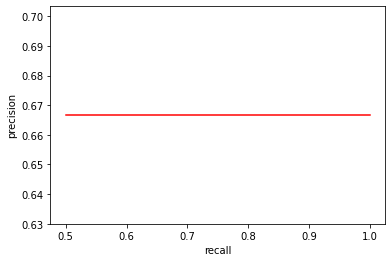

In [51]:
precisao_interpolada(rp_vetorial1)

#### Teste para a entrada 1 - BM25

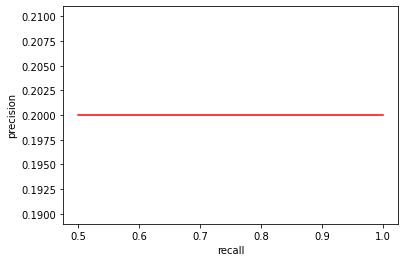

In [52]:
precisao_interpolada(rp_bm25_1)

#### Teste para a entrada 2 - Modelo Vetorial

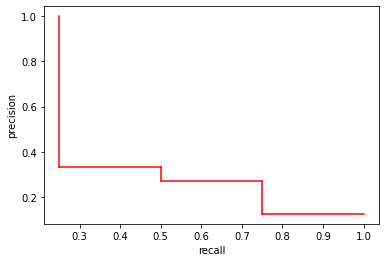

In [53]:
precisao_interpolada(rp_vetorial2)

#### Teste para a entrada 2 - BM25

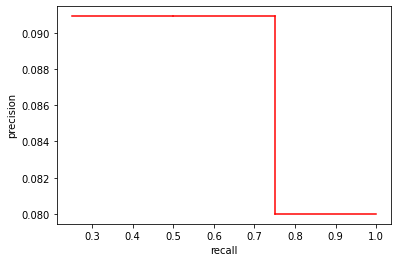

In [54]:
precisao_interpolada(rp_bm25_2)

### MAPi

In [55]:
def MAPi(rp):
    
    return rp["Precision"].mean()

#### Teste para a entrada 1 - Modelo Vetorial

In [56]:
MAPi(rp_vetorial1)

0.6666666666666666

#### Teste para a entrada 1 - BM25

In [57]:
MAPi(rp_bm25_1)

0.2

#### Teste para a entrada 2 - Modelo Vetorial

In [58]:
MAPi(rp_vetorial2)

0.4327651515151515

#### Teste para a entrada 2 - BM25

In [59]:
MAPi(rp_bm25_2)

0.08818181818181818